In [37]:
import pandas as pd
# Load the dataset
ds = pd.read_csv("https://raw.githubusercontent.com/evipriyanka/randomwalk-ds-assessment-level2/refs/heads/main/dataset.csv")


In [38]:
#Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)

# Check for missing values
missing_data = ds.isnull().sum()
print(f"Missing data in each column:\n{missing_data}")

# Handling missing data: Impute with median for numerical columns and mode for categorical columns
ds['body_mass_g'] = ds['body_mass_g'].fillna(ds['body_mass_g'].median())
ds['bill_length_mm'] = ds['bill_length_mm'].fillna(ds['bill_length_mm'].median())
ds['bill_depth_mm'] = ds['bill_depth_mm'].fillna(ds['bill_depth_mm'].median())

# Check and remove duplicates
duplicates = ds.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
ds = ds.drop_duplicates()

# Verify missing values after cleaning
missing_data_clean = ds.isnull().sum()
print(f"Missing data after cleaning:\n{missing_data_clean}")


Missing data in each column:
species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64
Number of duplicate rows: 0
Missing data after cleaning:
species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     2
body_mass_g           0
sex                  16
dtype: int64


In [39]:
#Q2: What is the average body_mass_g for Gentoo penguins?

# Filter the dataset for Gentoo penguins and calculate the average body_mass_g
avg_body_mass_g = ds[ds['species'] == 'Gentoo']['body_mass_g'].mean()
print(f"Average body mass for Gentoo penguins: {avg_body_mass_g}")


Average body mass for Gentoo penguins: 5125.0


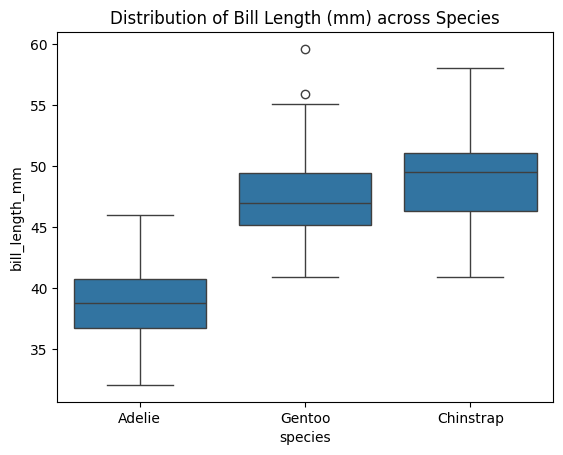

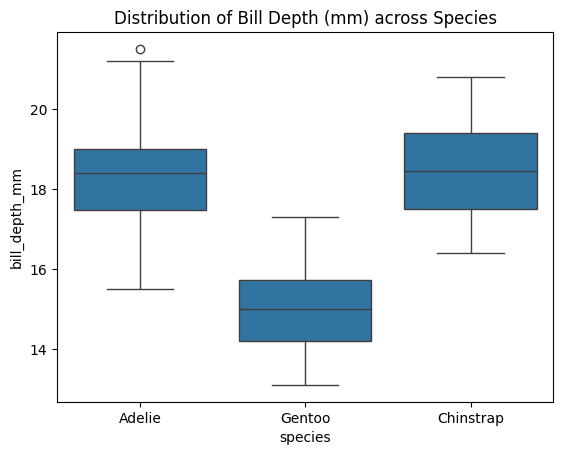

Adelie - bill_length_mm Skewness: 0.1664747497317031, Kurtosis: -0.2244853076721096
Gentoo - bill_length_mm Skewness: 0.720892965403421, Kurtosis: 1.177040149399649
Chinstrap - bill_length_mm Skewness: -0.09320278848611344, Kurtosis: -0.11906906387411009
Adelie - bill_depth_mm Skewness: 0.32956749247508915, Kurtosis: -0.09603933294231926
Gentoo - bill_depth_mm Skewness: 0.3464126768963668, Kurtosis: -0.5844485613331551
Chinstrap - bill_depth_mm Skewness: 0.0067259608078862046, Kurtosis: -0.898739653084359


In [40]:
#Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species.

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Visualize distributions using boxplot
sns.boxplot(x='species', y='bill_length_mm', data=ds)
plt.title('Distribution of Bill Length (mm) across Species')
plt.show()

sns.boxplot(x='species', y='bill_depth_mm', data=ds)
plt.title('Distribution of Bill Depth (mm) across Species')
plt.show()

# Skewness and Kurtosis for bill_length_mm and bill_depth_mm by species
for feature in ['bill_length_mm', 'bill_depth_mm']:
    for species in ds['species'].unique():
        species_data = ds[ds['species'] == species][feature]
        print(f"{species} - {feature} Skewness: {skew(species_data)}, Kurtosis: {kurtosis(species_data)}")


Outliers in the dataset:
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          3
dtype: int64


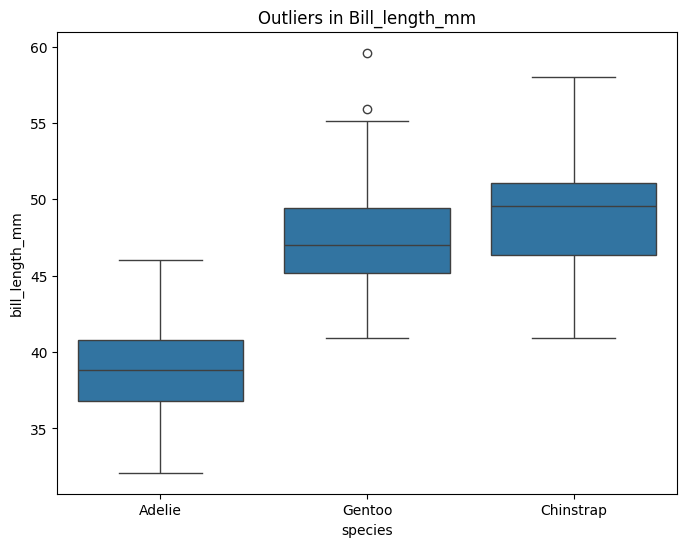

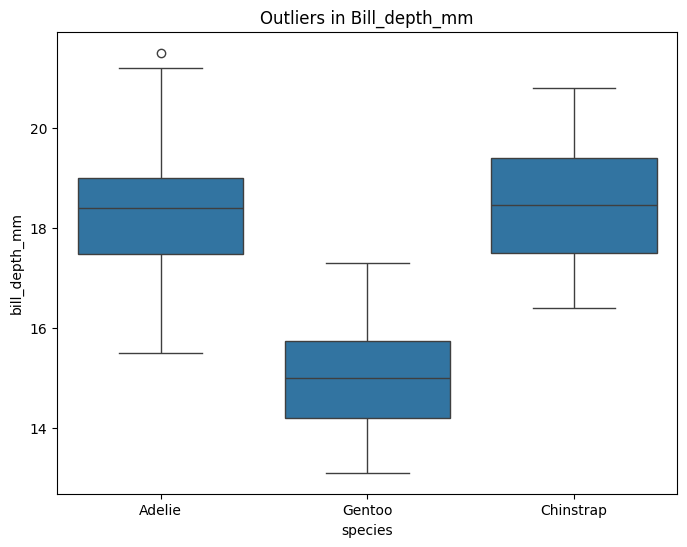

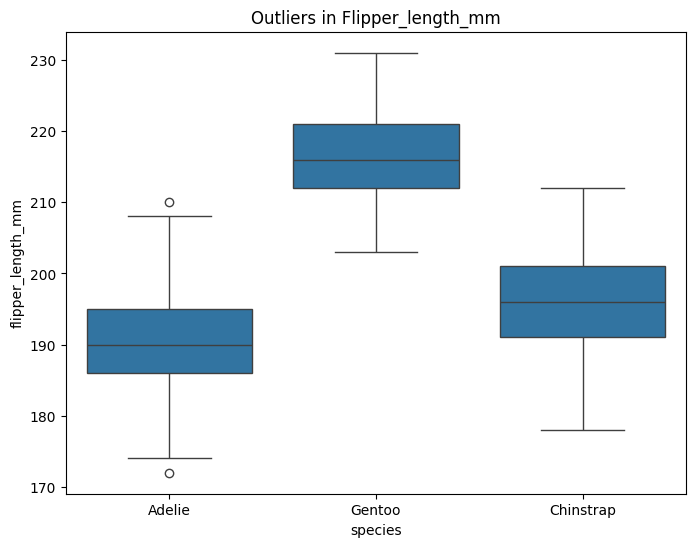

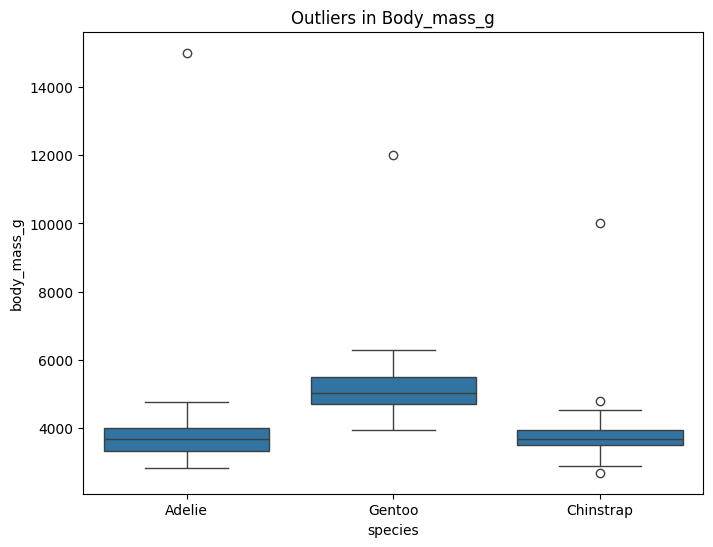

In [41]:
#Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers.

import seaborn as sns
import matplotlib.pyplot as plt

# Detecting outliers using IQR method
Q1 = ds[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].quantile(0.25)
Q3 = ds[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].quantile(0.75)
IQR = Q3 - Q1

# Condition to detect outliers
outliers = ((ds[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] < (Q1 - 1.5 * IQR)) |
            (ds[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] > (Q3 + 1.5 * IQR)))

# Count the number of outliers
outlier_count = outliers.sum()
print(f"Outliers in the dataset:\n{outlier_count}")

# Visualize outliers using boxplots for each feature
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='species', y=feature, data=ds)
    plt.title(f'Outliers in {feature.capitalize()}')
    plt.show()



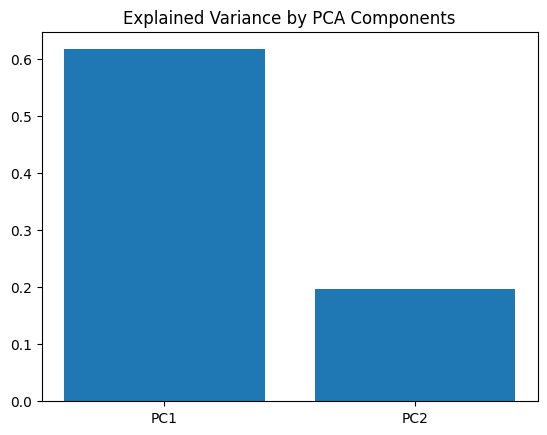

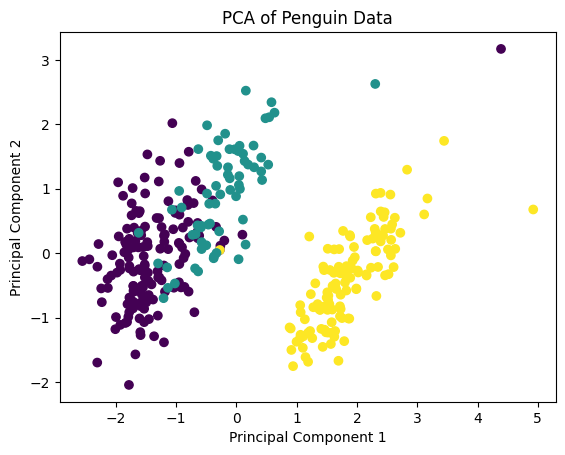

In [42]:
#Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA.

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Handle missing values before performing PCA
# Option 1: Impute missing values with the median (you can also use mean or mode)
ds[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = ds[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].fillna(ds[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].median())

# Select relevant features for PCA
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
ds_features = ds[features]

# Standardize the features before applying PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(ds_features)

# Apply PCA and reduce the dimensionality to 2 components for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Plot explained variance ratio
plt.bar(range(1, 3), pca.explained_variance_ratio_, tick_label=["PC1", "PC2"])
plt.title('Explained Variance by PCA Components')
plt.show()

# Plot the PCA components
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=ds['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}), cmap='viridis')
plt.title('PCA of Penguin Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



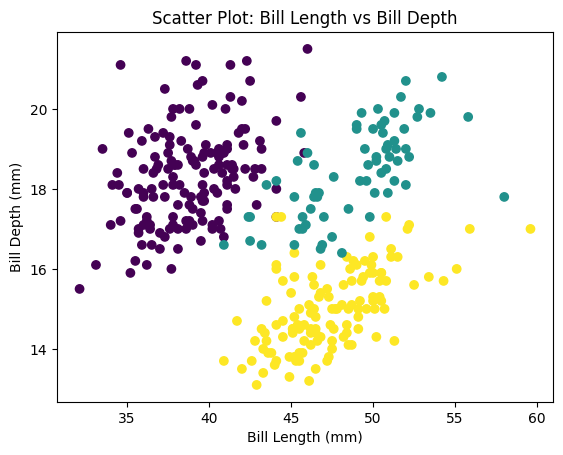

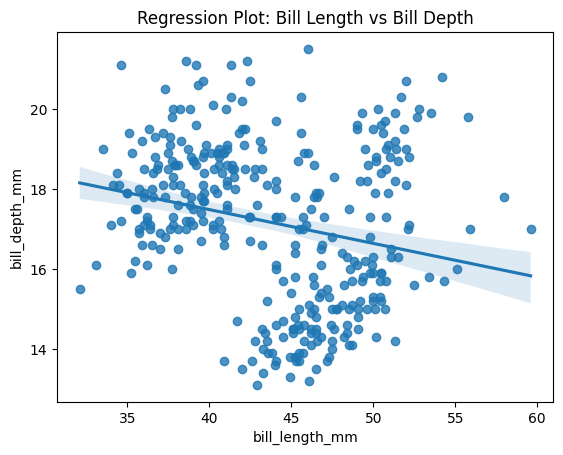

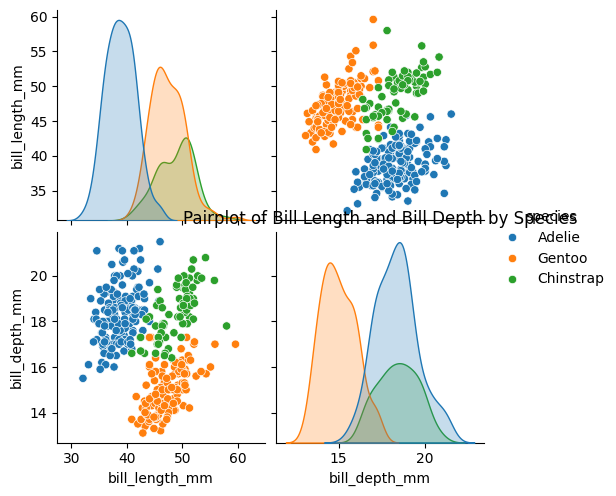

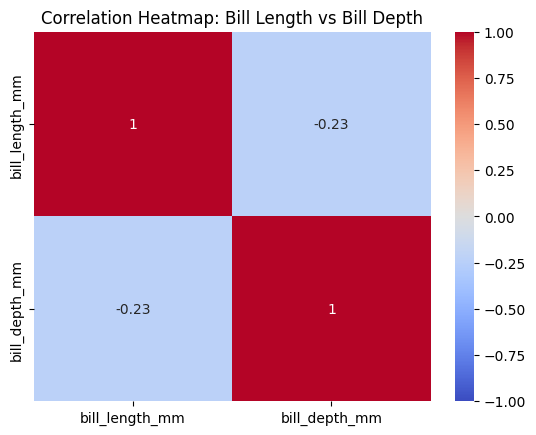

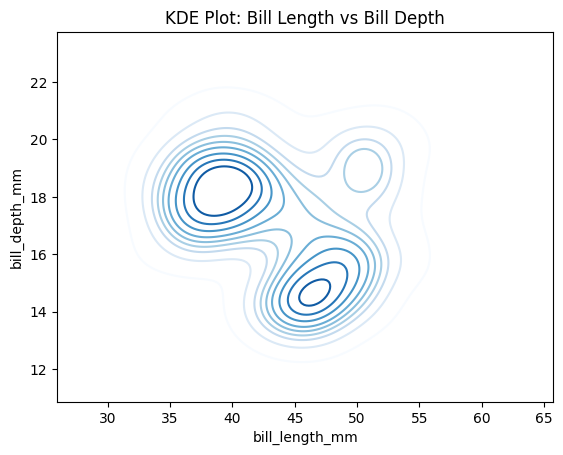

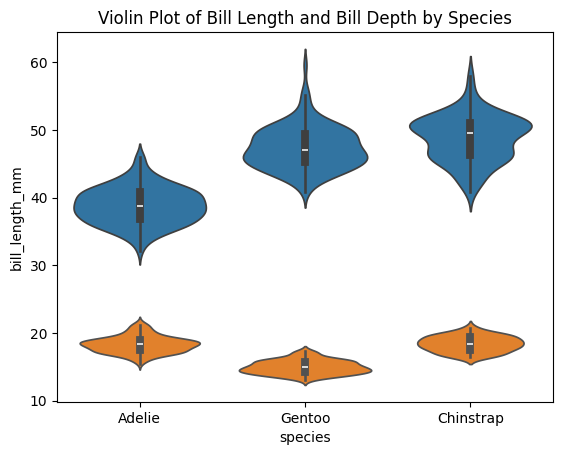

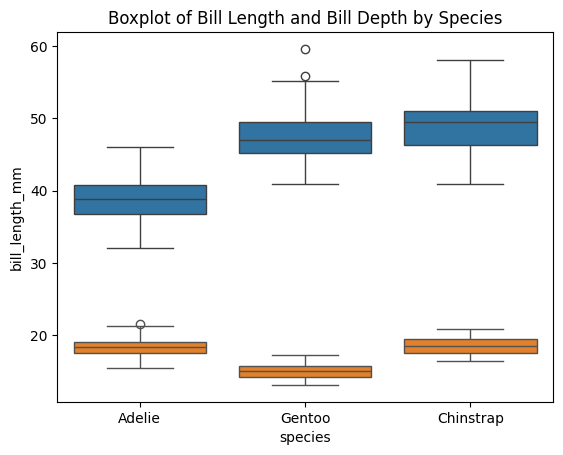

In [43]:
#Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them.

# Scatter plot
plt.scatter(ds['bill_length_mm'], ds['bill_depth_mm'], c=ds['species'].map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}), cmap='viridis')
plt.title('Scatter Plot: Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

# Regression plot
sns.regplot(x='bill_length_mm', y='bill_depth_mm', data=ds)
plt.title('Regression Plot: Bill Length vs Bill Depth')
plt.show()

# Pairplot
sns.pairplot(ds[['bill_length_mm', 'bill_depth_mm', 'species']], hue='species')
plt.title('Pairplot of Bill Length and Bill Depth by Species')
plt.show()

# Correlation Heatmap
corr = ds[['bill_length_mm', 'bill_depth_mm']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Bill Length vs Bill Depth')
plt.show()

# KDE plot
sns.kdeplot(x='bill_length_mm', y='bill_depth_mm', data=ds, cmap='Blues')
plt.title('KDE Plot: Bill Length vs Bill Depth')
plt.show()

# Violin plot
sns.violinplot(x='species', y='bill_length_mm', data=ds)
sns.violinplot(x='species', y='bill_depth_mm', data=ds)
plt.title('Violin Plot of Bill Length and Bill Depth by Species')
plt.show()

# Boxplot
sns.boxplot(x='species', y='bill_length_mm', data=ds)
sns.boxplot(x='species', y='bill_depth_mm', data=ds)
plt.title('Boxplot of Bill Length and Bill Depth by Species')
plt.show()

In [44]:
#Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island?

# Grouping by 'species' and 'island' to find the maximum 'flipper_length_mm' for each combination
max_flipper_length = ds.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()

# Handling missing values by dropping rows with NaN values
max_flipper_length = max_flipper_length.dropna(subset=['flipper_length_mm'])

print("Maximum flipper length for each species and island:")
print(max_flipper_length)

# Finding the species with the longest flippers on each island
longest_flippers = max_flipper_length.loc[max_flipper_length.groupby('island')['flipper_length_mm'].idxmax()]
print("\nSpecies with the longest flippers on each island:")
print(longest_flippers)


Maximum flipper length for each species and island:
     species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0

Species with the longest flippers on each island:
     species     island  flipper_length_mm
4     Gentoo     Biscoe              231.0
3  Chinstrap      Dream              212.0
2     Adelie  Torgersen              210.0


In [45]:
#Q8: Perform z-score normalization on this dataset.

from scipy.stats import zscore

# Apply z-score normalization to relevant numerical columns
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
ds[numerical_columns] = ds[numerical_columns].apply(zscore)

# Display the normalized dataset
print(ds.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.883054       0.787289          -1.420541   
1  Adelie  Torgersen       -0.809180       0.126114          -1.063485   
2  Adelie  Torgersen       -0.661432       0.431272          -0.420786   
3  Adelie  Torgersen        0.040373       0.075255          -0.277964   
4  Adelie  Torgersen       -1.326299       1.092447          -0.563608   

   body_mass_g     sex  
0    -0.468990    male  
1    -0.424125  female  
2    -0.917634  female  
3    -0.199803     NaN  
4    -0.738176  female  
